In [2]:
# do all imports
import pandas as pd
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mode
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

# magic command to display all plots inline
%matplotlib osx


In [3]:
# define function to load trend data

def combine_trend_files(directory, file_prefix):
    """
    Combines multiple CSV files with the same prefix into a single dataframe.
    
    Args:
        directory (str): Path to directory containing CSV files
        file_prefix (str): Prefix of files to combine
        
    Returns:
        pd.DataFrame: Combined dataframe with columns named by iteration
    """
    # Get all CSV files that start with the prefix
    files = [f for f in os.listdir(directory) 
             if f.startswith(file_prefix) and f.endswith('.csv')]

    # Sort files by their iteration number
    files.sort(key=lambda x: int(re.search(r'_i(\d+)\.csv$', x).group(1)))

    # Initialize an empty list to store dataframes
    dfs = []

    # Read each file and store in the list
    for file in files:
        # Extract the iteration number from the filename
        iter_num = re.search(r'_i(\d+)\.csv$', file).group(1)
        # Read the CSV file
        df = pd.read_csv(os.path.join(directory, file), index_col=0)
        # Rename the column to match the iteration number
        df.columns = [f"i{iter_num}"]
        dfs.append(df)

    # Combine all dataframes horizontally
    combined_df = pd.concat(dfs, axis=1)
    
    return combined_df



In [3]:
# load data for first search term
directory = "./testdata"
file_prefix_1 = "artificial_intelligence"
combined_df_1 = combine_trend_files(directory, file_prefix_1)
print(f"Processed files with prefix '{file_prefix_1}'")
print(f"Shape: {combined_df_1.shape}")

Processed files with prefix 'artificial_intelligence'
Shape: (70, 348)


In [4]:
# load data for second search term
directory = "./testdata"
file_prefix_2 = "bathroom_bill"
combined_df_2 = combine_trend_files(directory, file_prefix_2)
print(f"Processed files with prefix '{file_prefix_2}'")
print(f"Shape: {combined_df_2.shape}")

Processed files with prefix 'bathroom_bill'
Shape: (204, 330)


In [5]:
# load data for third search term
directory = "./testdata"
file_prefix_3 = "qanon"
combined_df_3 = combine_trend_files(directory, file_prefix_3)
print(f"Processed files with prefix '{file_prefix_3}'")
print(f"Shape: {combined_df_3.shape}")

Processed files with prefix 'qanon'
Shape: (84, 224)


NameError: name 'combined_df_1' is not defined

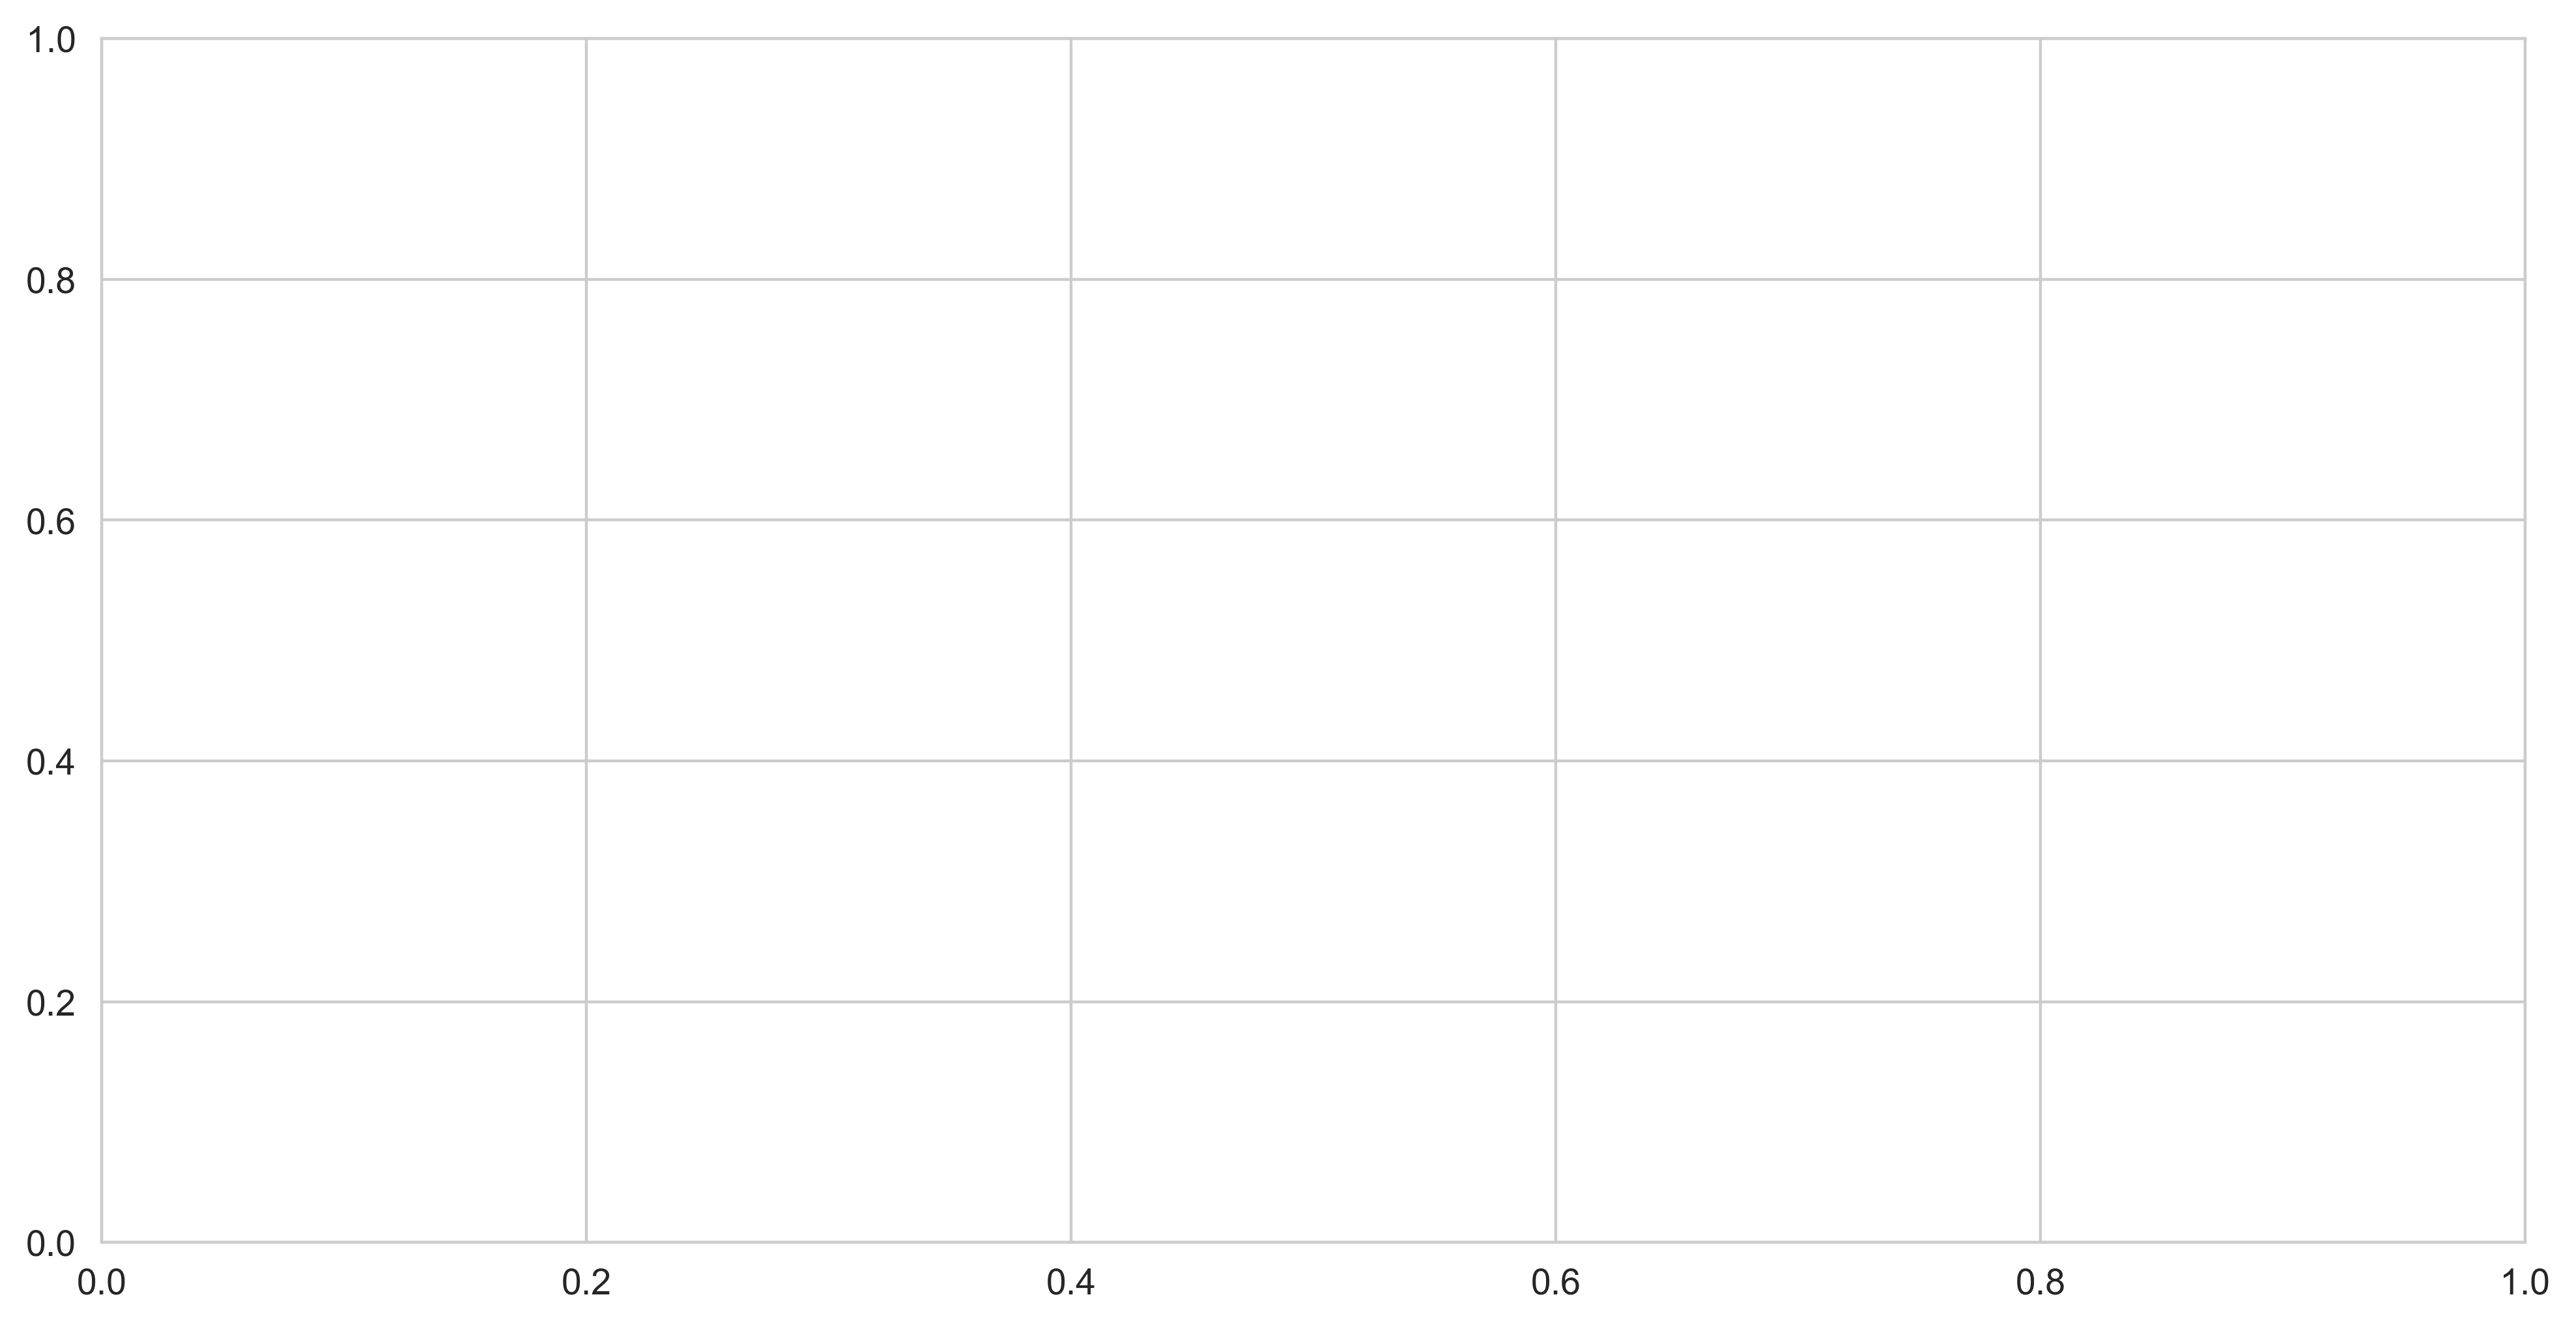

In [1]:
# plot data the old way, I don't like this one as much
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set the style for better visualization
sns.set_style("whitegrid")

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(12, 6), dpi=400)  # Double the default DPI of 200

# Create the line plot with low alpha for background lines
for column in combined_df_1.columns:
    ax.plot(combined_df_1.index, combined_df_1[column], alpha=0.1, color='gray')

# For each time point, count how many columns share each unique value
for idx in combined_df_1.index:
    values = combined_df_1.loc[idx]
    value_counts = values.value_counts()
    
    # For each unique value at this time point
    for value, count in value_counts.items():
        # Calculate color based on count (normalize by total columns)
        color = plt.cm.viridis(count / len(combined_df_1.columns))
        # Plot point with size proportional to count
        ax.scatter(idx, value, color=color, s=100, alpha=0.7)

# Customize the plot
ax.set_title('Google Trends Data Over Time', fontsize=14)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Interest', fontsize=12)
plt.xticks(rotation=45, fontsize=8)

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, 
                          norm=plt.Normalize(vmin=1, 
                                          vmax=len(combined_df_1.columns)))
sm.set_array([])  # Set array for the mappable
cbar = plt.colorbar(sm, ax=ax)  # Pass the axis object
cbar.set_label('Number of iterations with same value', fontsize=10)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()


In [10]:
# define function to plot trends with counts
def plot_trends_with_counts(combined_df, search_term):
    """
    Create a plot showing Google Trends data with count annotations.
    
    Args:
        combined_df: DataFrame containing the Google Trends time series data
        search_term: String containing the search term used to generate the data
    """
    # Set the style for better visualization
    sns.set_style("whitegrid")

    # Create figure and axis objects
    fig, ax = plt.subplots(figsize=(12, 6), dpi=800)  # Double the default DPI of 200

    # Create the line plot with low alpha for background lines
    for column in combined_df.columns:
        ax.plot(combined_df.index, combined_df[column], alpha=0.1, color='gray')

    # For each time point, count how many columns share each unique value
    for idx in combined_df.index:
        values = combined_df.loc[idx]
        value_counts = values.value_counts()
        
        # For each unique value at this time point
        for value, count in value_counts.items():
            # Calculate color based on count (normalize by total columns)
            color = plt.cm.viridis(count / len(combined_df.columns))
            # Add text annotation with the count
            ax.text(idx, value, str(count), color=color, 
                    ha='center', va='center', fontweight='bold',
                    fontsize=8, alpha=0.7)

    # Customize the plot
    ax.set_title(f'Google Trends Data Over Time for "{search_term}"', fontsize=14)
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Interest', fontsize=12)
    plt.xticks(rotation=45, fontsize=6)

    # Add colorbar
    sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, 
                              norm=plt.Normalize(vmin=1, 
                                              vmax=len(combined_df.columns)))
    sm.set_array([])  # Set array for the mappable
    cbar = plt.colorbar(sm, ax=ax)  # Pass the axis object
    cbar.set_label('Number of iterations with same value', fontsize=10)

    # Adjust layout to prevent label cutoff
    plt.tight_layout()

    # Show the plot
    plt.show()

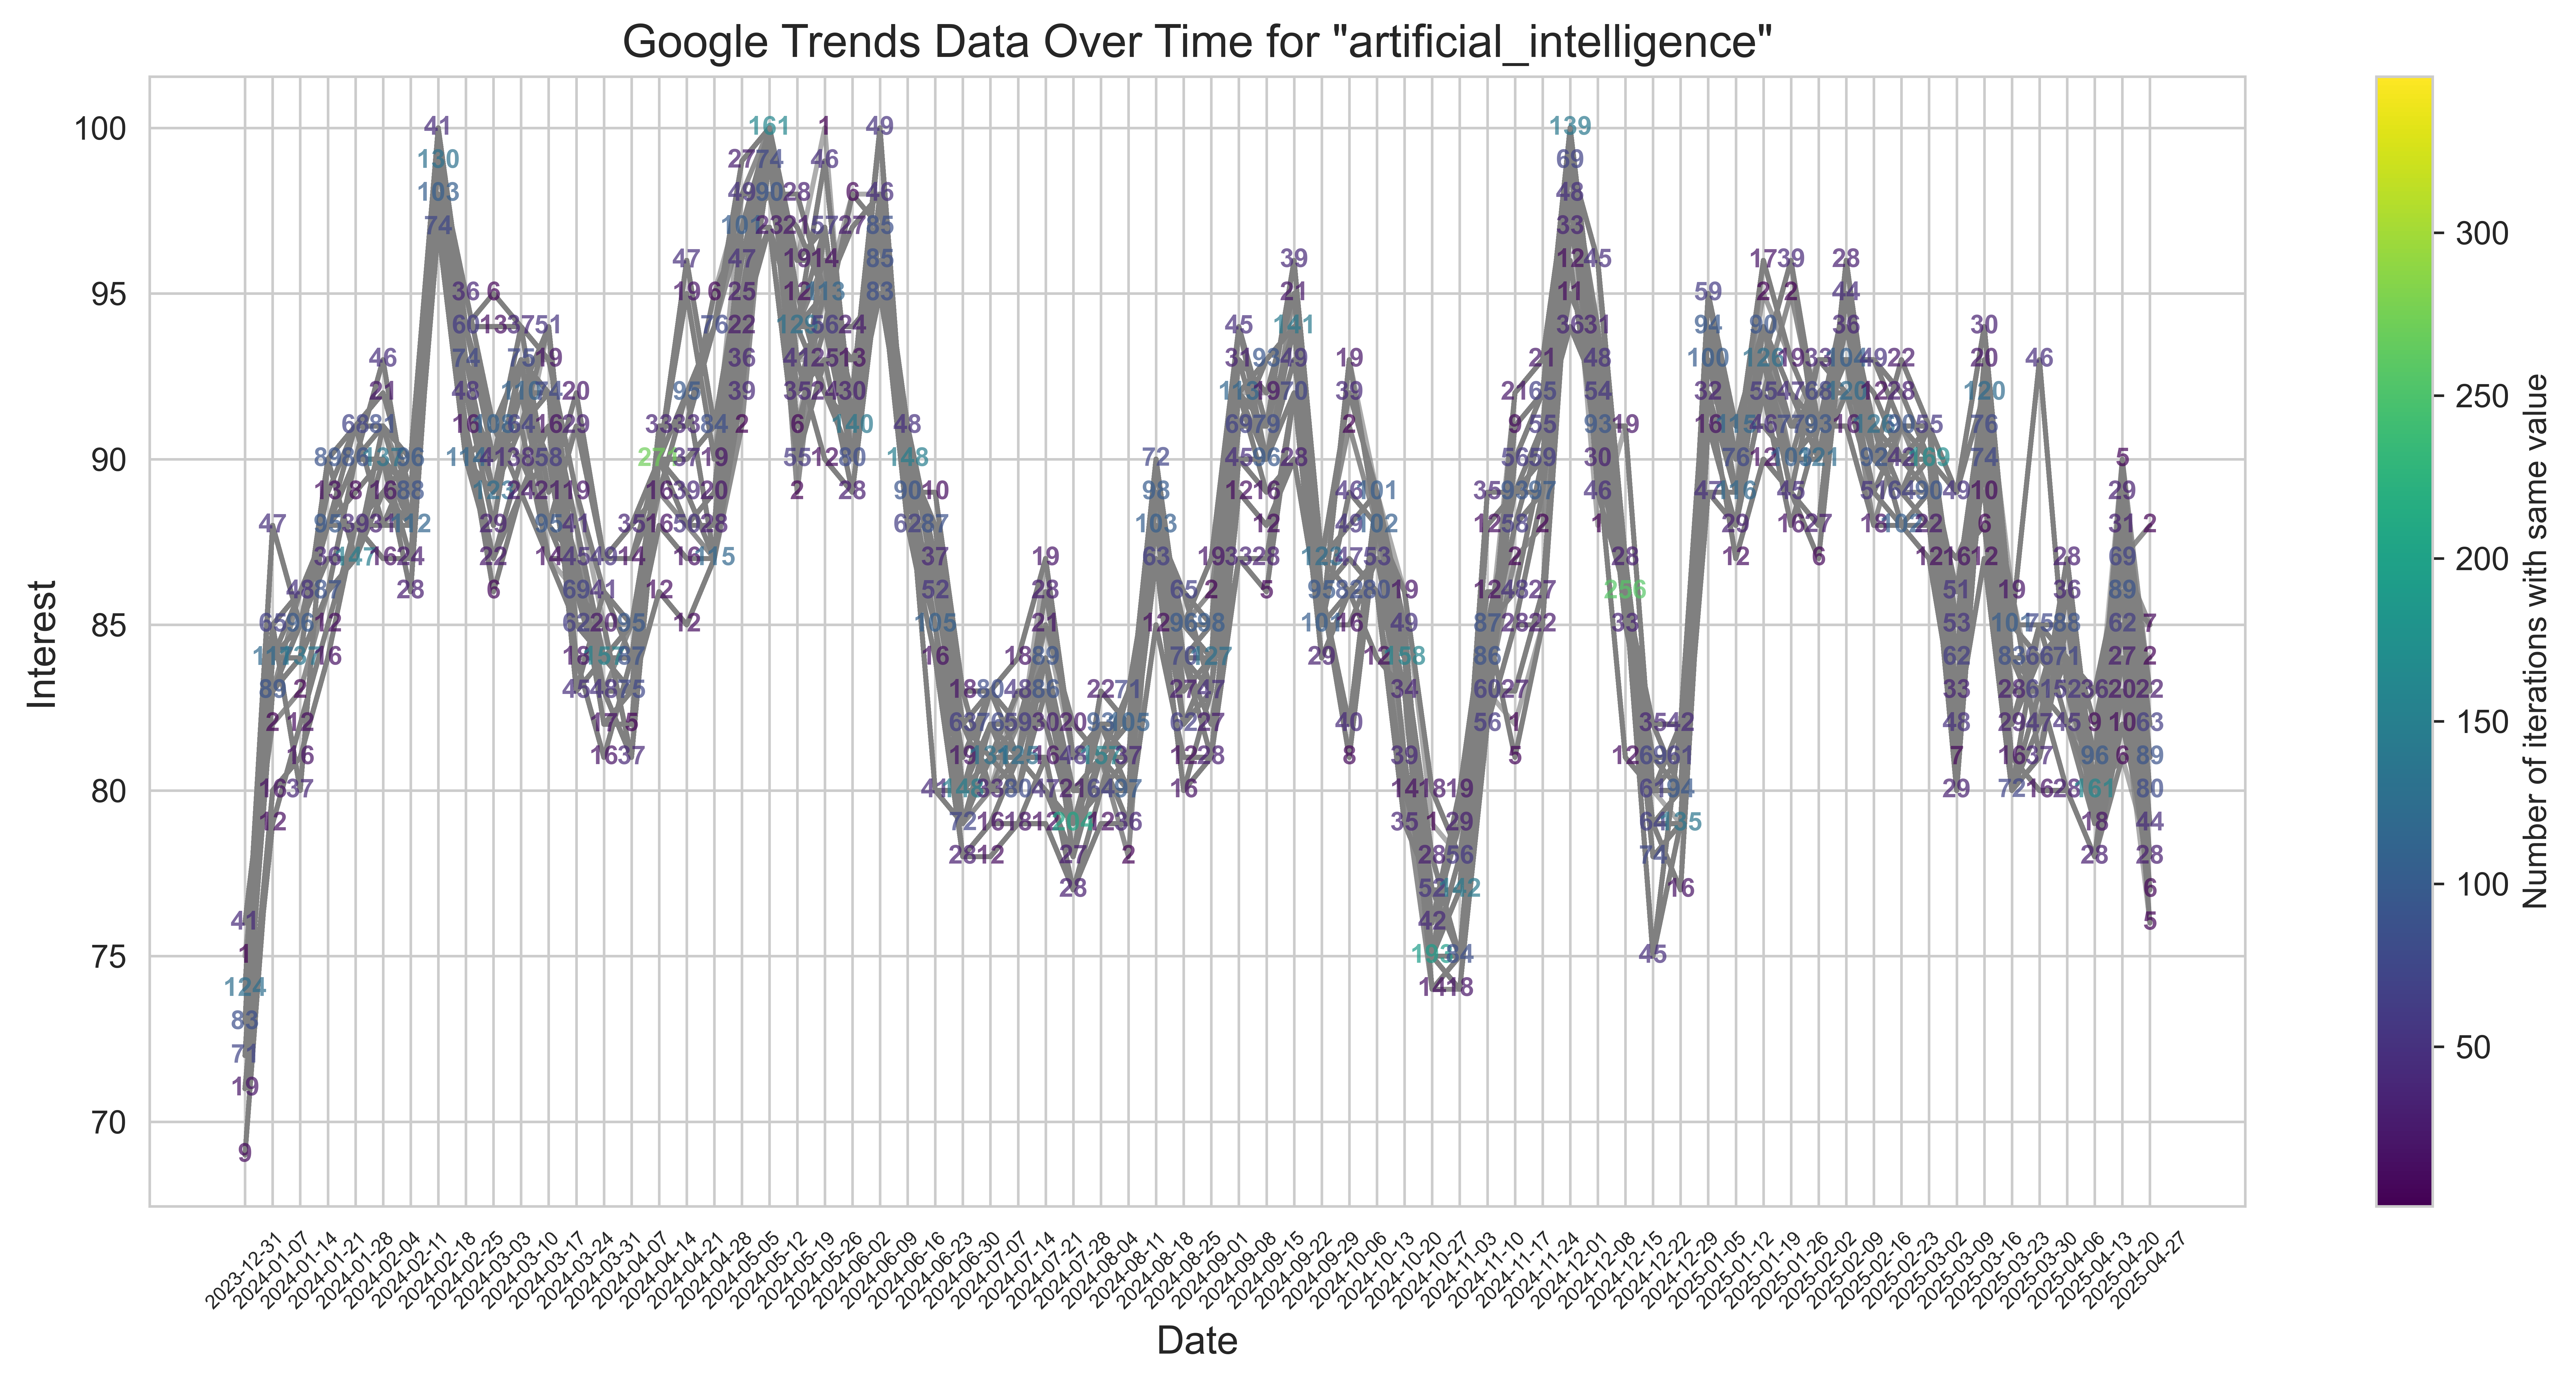

In [8]:
# do the plot for the first search term
plot_trends_with_counts(combined_df_1, file_prefix_1)



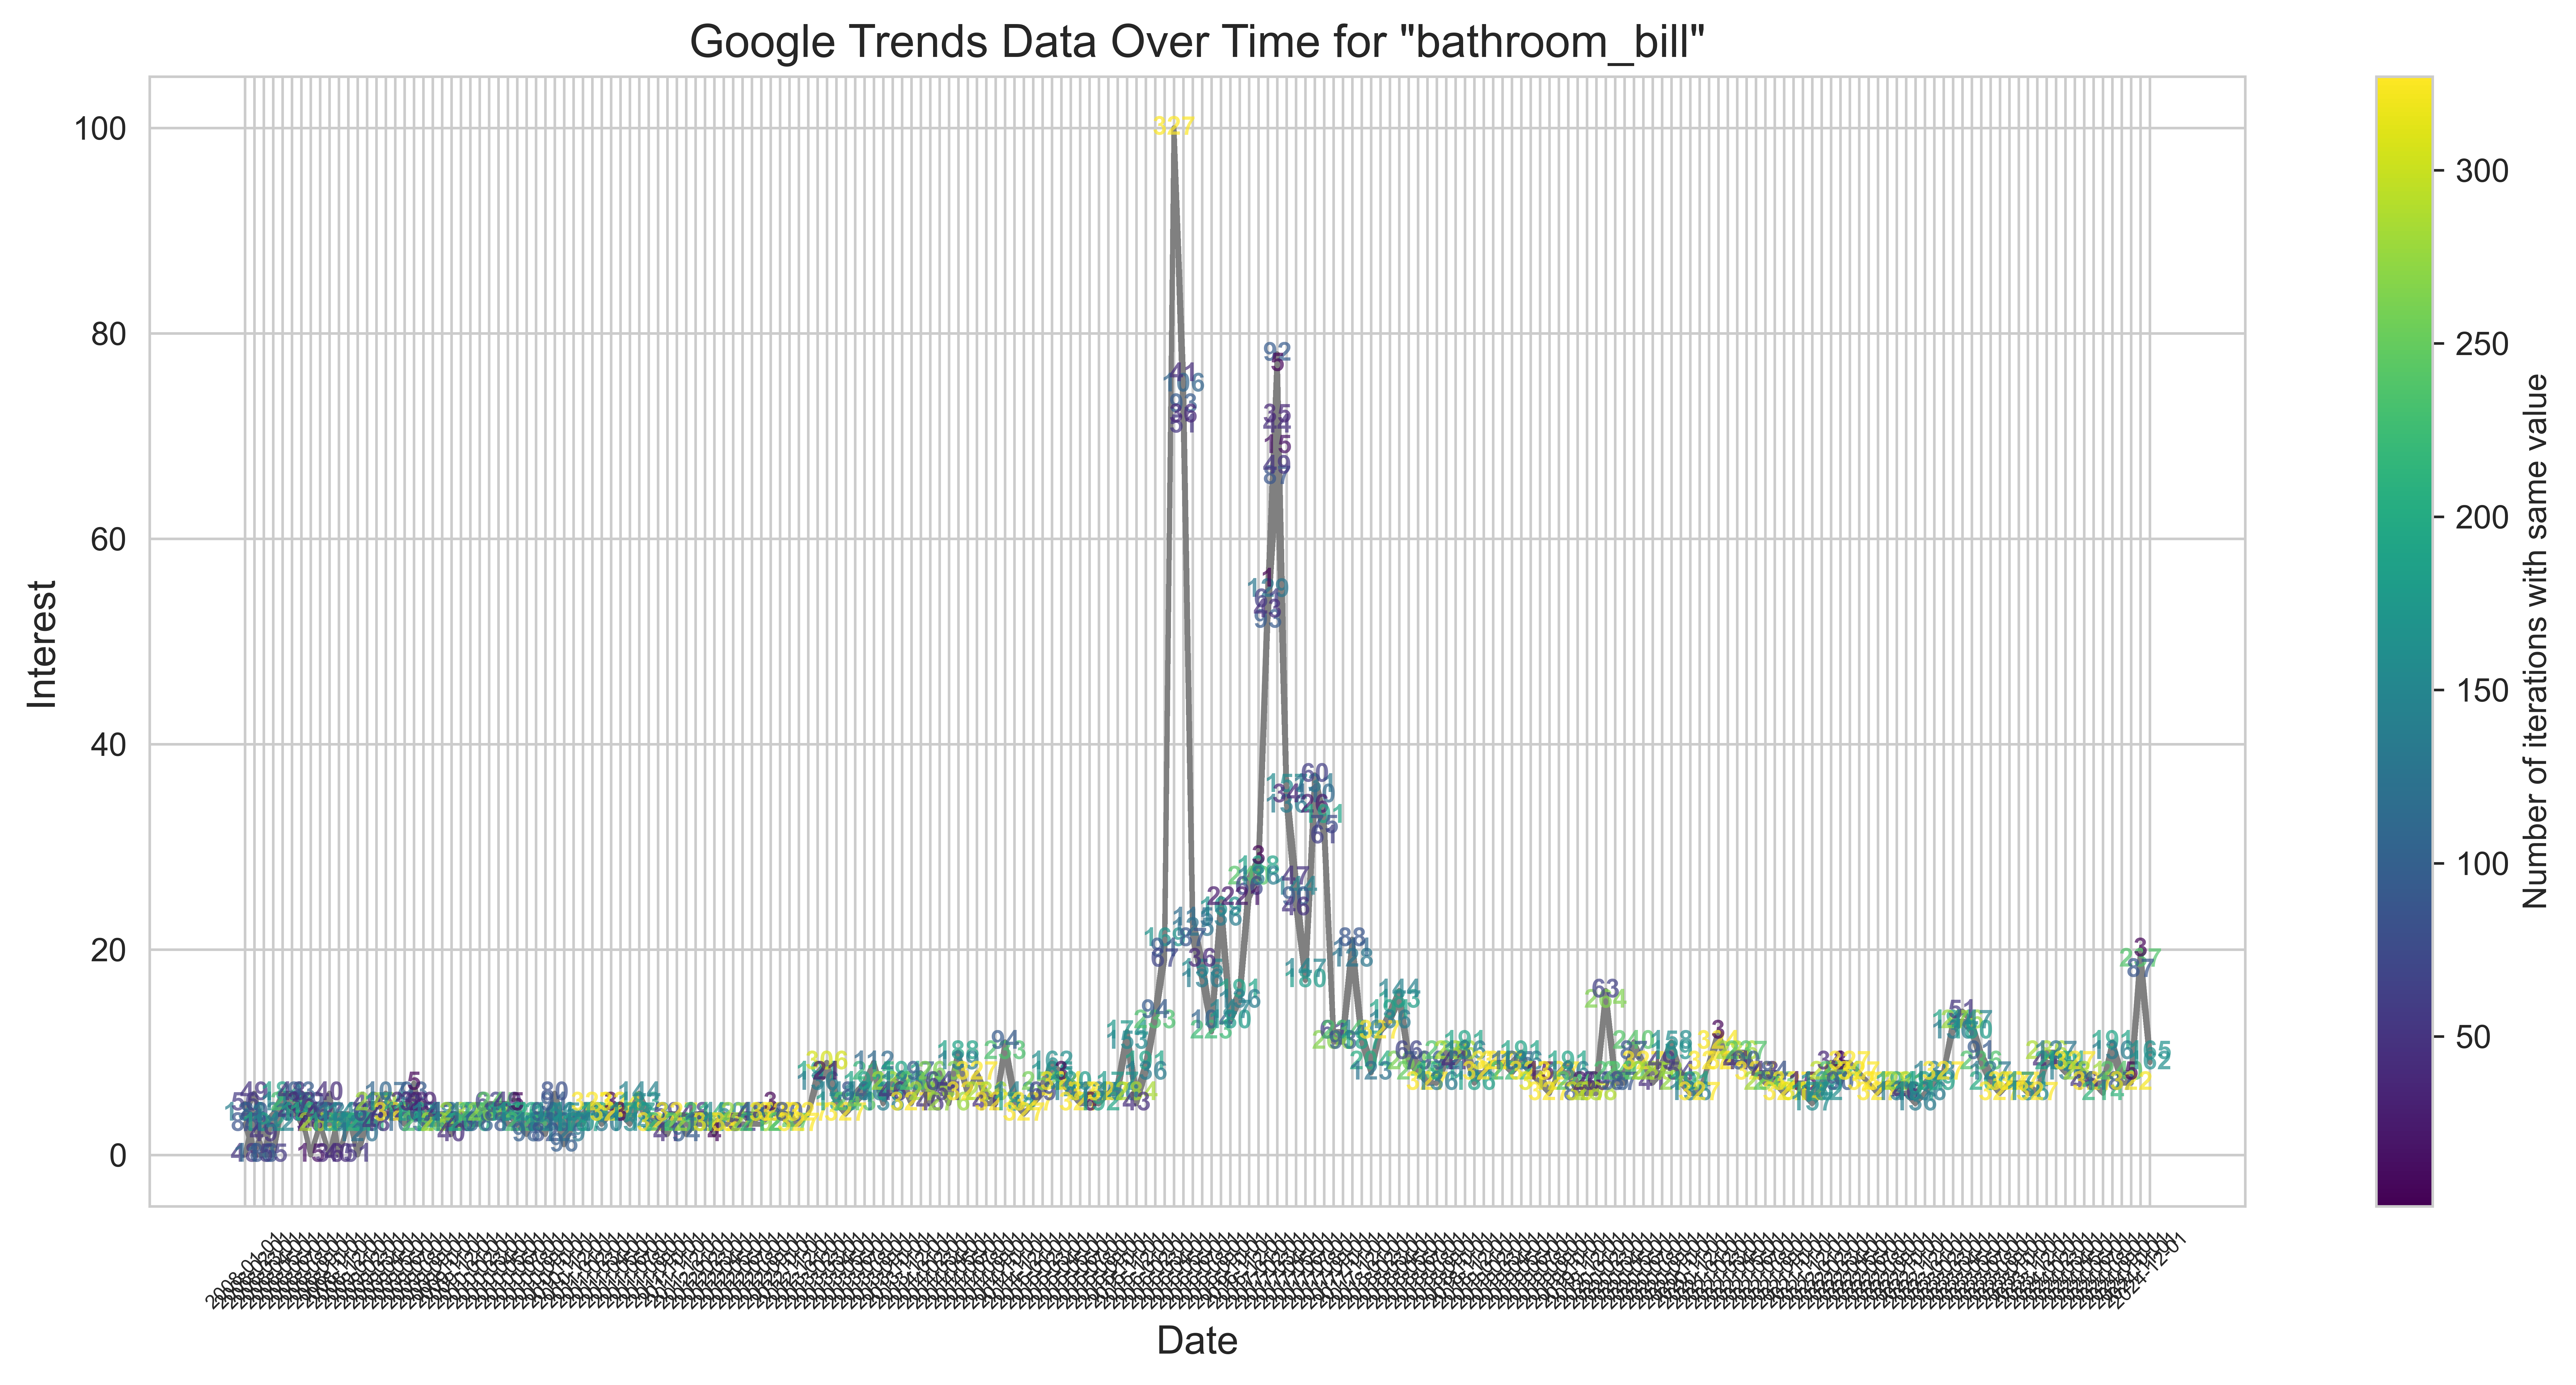

In [7]:
# do the plot for the second search term
plot_trends_with_counts(combined_df_2, file_prefix_2)

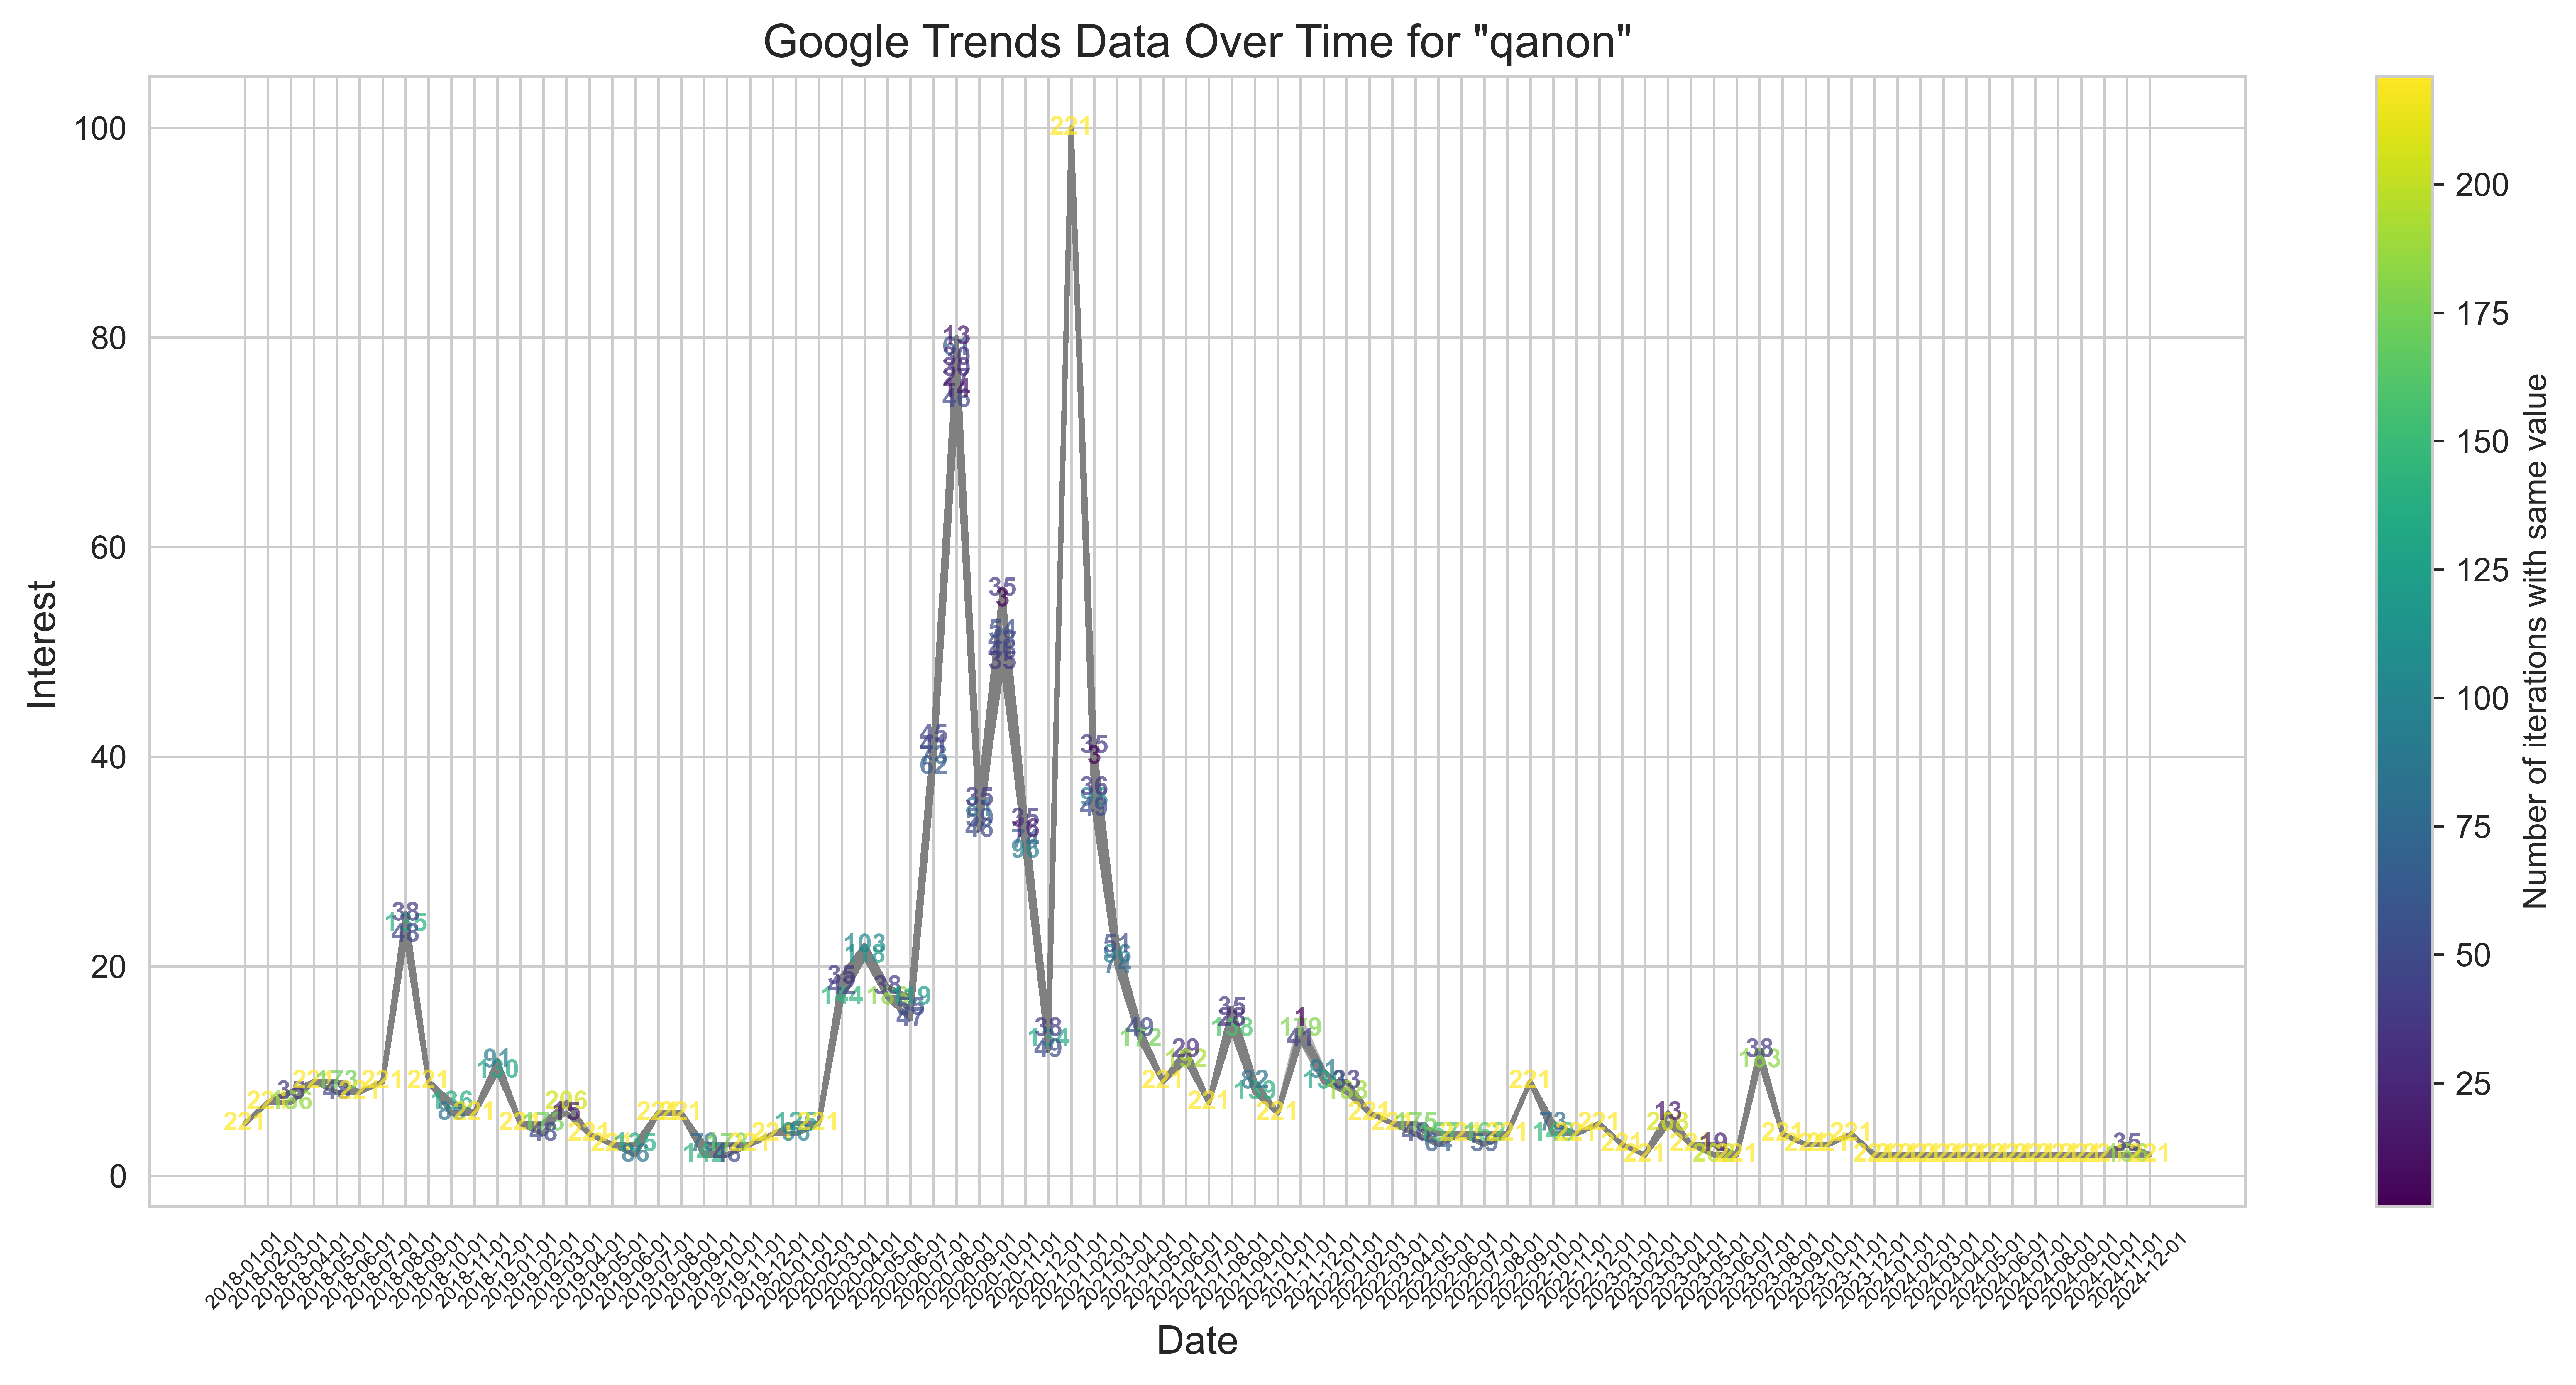

In [8]:
# do the plot for the third search term
plot_trends_with_counts(combined_df_3, file_prefix_3)

In [20]:
import pandas as pd
import numpy as np

def get_value_counts_matrix(df):
    """
    Creates a matrix of value counts for each row in the input DataFrame.
    Each row represents a row from the original DataFrame, containing the sorted counts of unique values.
    Rows are padded with zeros to match the length of the row with the most unique values.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input DataFrame to analyze
        
    Returns:
    --------
    pandas.DataFrame
        A DataFrame where each row contains the sorted value counts for a row from the input DataFrame,
        padded with zeros if necessary.
    """
    # Get value counts for each row using numpy's unique with counts
    value_counts = {}
    for idx in df.index:
        # Convert row to numpy array and get unique values and counts
        row_array = df.loc[idx].to_numpy()
        _, counts = np.unique(row_array, return_counts=True)
        # Sort counts in descending order
        counts = np.sort(counts)[::-1]
        value_counts[idx] = counts
    
    # Find the maximum number of unique values across all rows
    max_unique = max(len(counts) for counts in value_counts.values())
    
    # Pad each count array with zeros to match the maximum length
    padded_counts = {idx: np.pad(counts, (0, max_unique - len(counts)), 
                                mode='constant', constant_values=0)
                    for idx, counts in value_counts.items()}
    
    # Create the output DataFrame
    result_df = pd.DataFrame.from_dict(padded_counts, orient='index')
    
    return result_df

# Example usage:
# result = get_value_counts_matrix(your_dataframe)

In [22]:
testcounts1 = get_value_counts_matrix(combined_df_1)
testcounts2 = get_value_counts_matrix(combined_df_2)
testcounts3 = get_value_counts_matrix(combined_df_3)


In [29]:
def plot_value_counts_histogram(value_counts_df, title="Value Counts Distribution", figsize=(12, 6)):
    """
    Creates a stacked histogram of value counts from the input DataFrame.
    Each row in the input DataFrame becomes one layer in the stacked histogram.
    
    Parameters:
    -----------
    value_counts_df : pandas.DataFrame
        DataFrame containing value counts (output from get_value_counts_matrix)
    title : str
        Title for the plot
    figsize : tuple
        Figure size (width, height)
    """
    # Create figure and axis
    fig, ax = plt.subplots(figsize=figsize)
    
    # Get the number of rows (layers) in the histogram
    n_layers = len(value_counts_df)
    
    # Create the stacked histogram
    # Each row in value_counts_df becomes one layer in the stack
    bottom = np.zeros(value_counts_df.shape[1])
    
    # Plot each row as a layer in the stack
    for idx in value_counts_df.index:
        values = value_counts_df.loc[idx]
        ax.bar(range(len(values)), values, bottom=bottom, alpha=0.7)
        bottom += values
    
    # Customize the plot
    ax.set_title(title)
    ax.set_xlabel('Count Value')
    ax.set_ylabel('Number of Occurrences')
    plt.tight_layout()
    
    return fig, ax

# Example usage:
# fig, ax = plot_value_counts_histogram(testcounts1, title="Value Counts Distribution for Dataset 1")


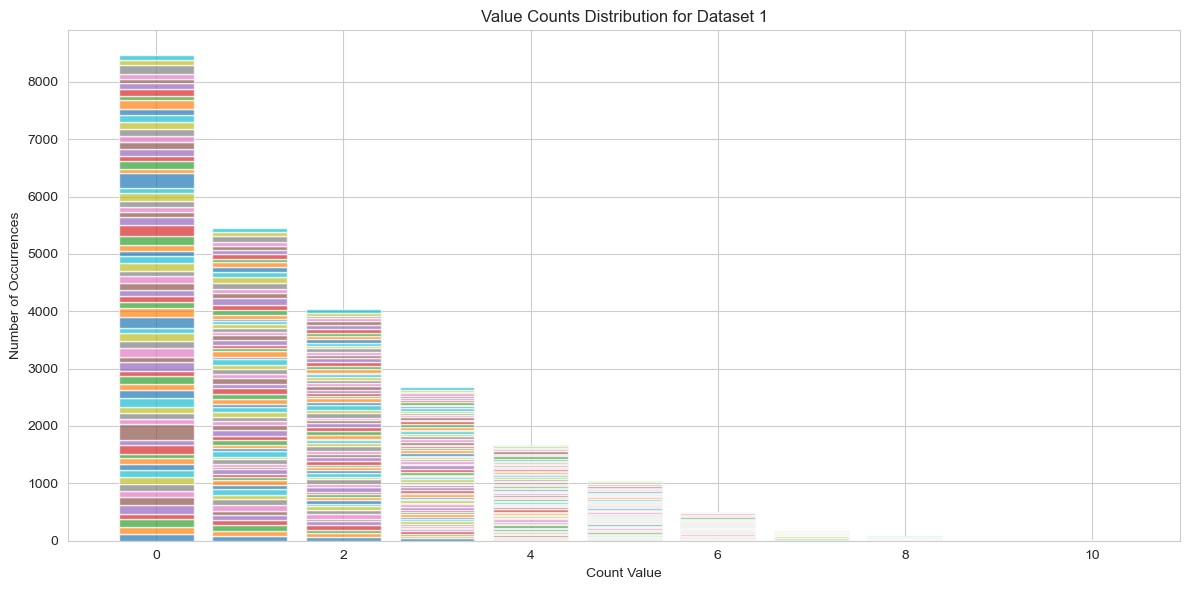

In [30]:
# Plot the value counts distribution for the first test dataset
fig, ax = plot_value_counts_histogram(testcounts1, title="Value Counts Distribution for Dataset 1")
plt.show()


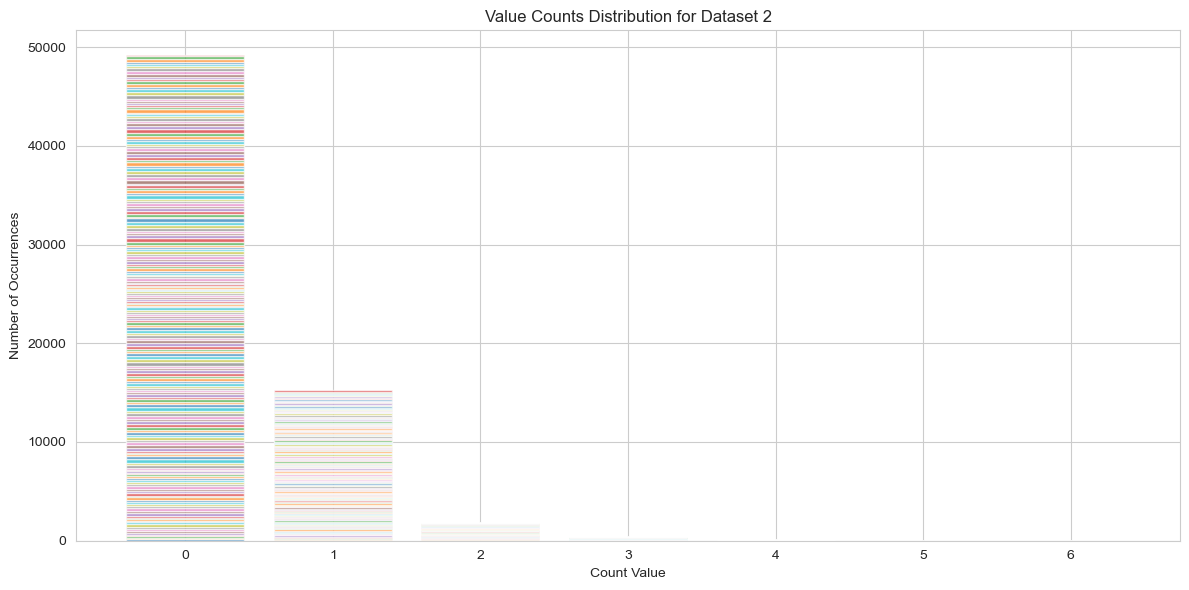

In [35]:
# Plot the value counts distribution for the second test dataset
fig, ax = plot_value_counts_histogram(testcounts2, title="Value Counts Distribution for Dataset 2")
plt.show()

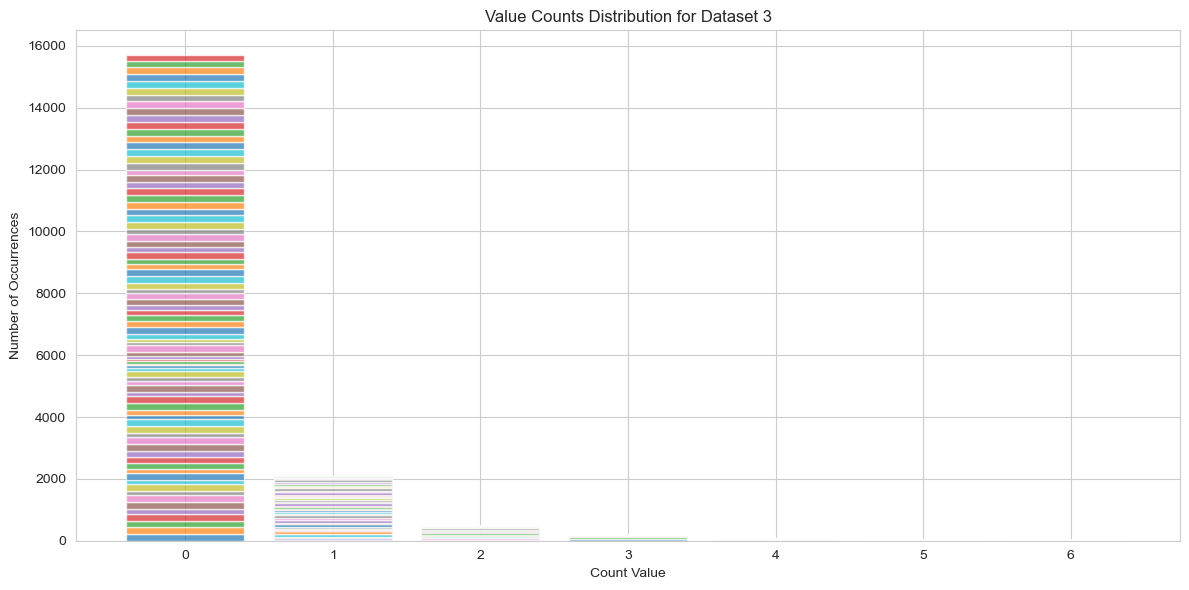

In [36]:
# Plot the value counts distribution for the third test dataset
fig, ax = plot_value_counts_histogram(testcounts3, title="Value Counts Distribution for Dataset 3")
plt.show()

In [32]:
def plot_second_to_first_ratio_histogram(value_counts_df, title="Ratio of Second to First Value Count", figsize=(12, 6)):
    """
    Creates a histogram showing the distribution of ratios between second highest and highest value counts
    for each row in the input DataFrame.
    
    Parameters:
    -----------
    value_counts_df : pandas.DataFrame
        DataFrame containing value counts (output from get_value_counts_matrix)
    title : str
        Title for the plot
    figsize : tuple
        Figure size (width, height)
    """
    # Calculate ratios for each row
    ratios = []
    for idx in value_counts_df.index:
        values = value_counts_df.loc[idx]
        # Get the two highest values
        highest_values = np.sort(values)[::-1][:2]
        # Calculate ratio if we have at least 2 non-zero values
        if highest_values[0] > 0:
            ratio = highest_values[1] / highest_values[0]
            ratios.append(ratio)
    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=figsize)
    
    # Plot histogram
    ax.hist(ratios, bins=20, alpha=0.7)
    
    # Customize the plot
    ax.set_title(title)
    ax.set_xlabel('Ratio (Second Highest / Highest)')
    ax.set_ylabel('Number of Columns')
    plt.tight_layout()
    
    return fig, ax

# Example usage:
# fig, ax = plot_second_to_first_ratio_histogram(testcounts1)


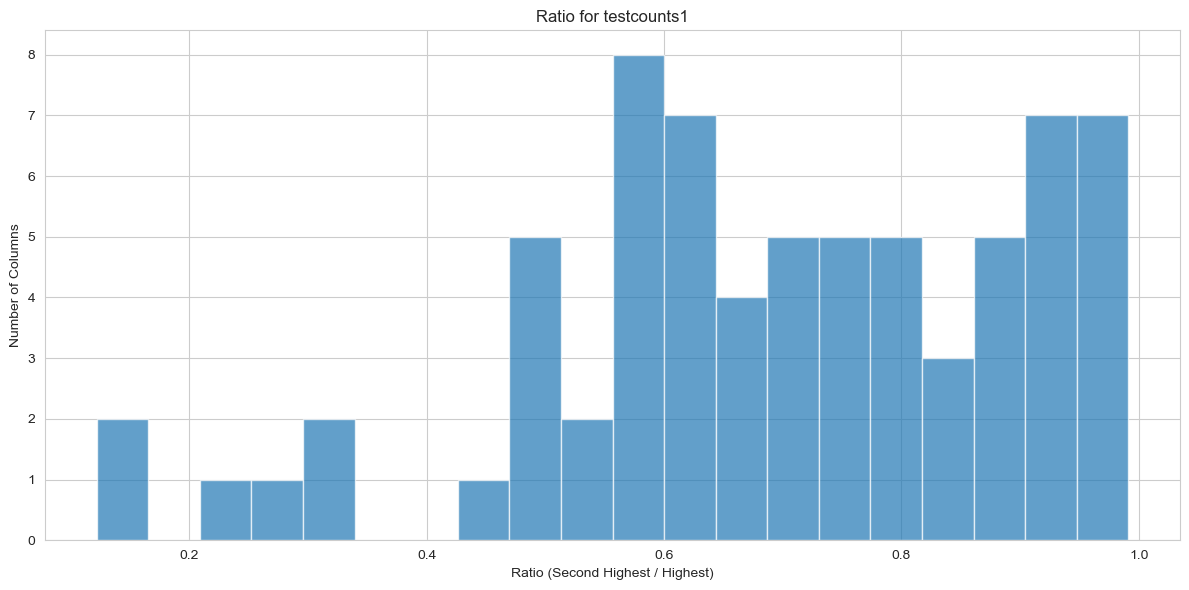

In [34]:
# Plot the second to first ratio histogram for the first test dataset
fig, ax = plot_second_to_first_ratio_histogram(testcounts1, "Ratio for testcounts1")
plt.show()


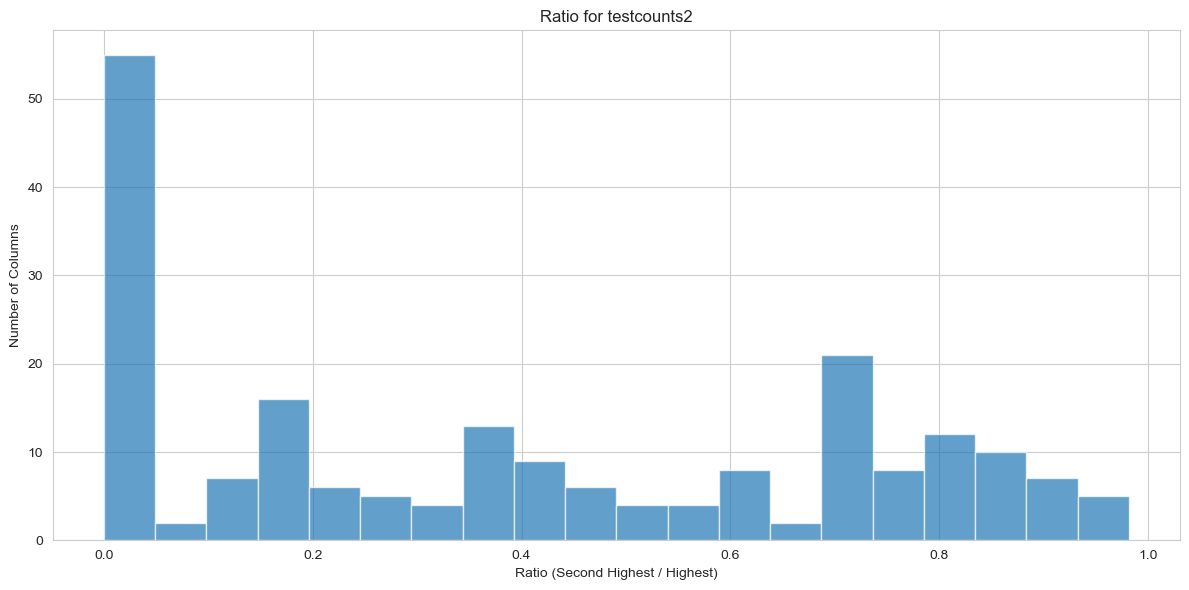

In [37]:
# Plot the second to first ratio histogram for the second test dataset
fig, ax = plot_second_to_first_ratio_histogram(testcounts2, "Ratio for testcounts2")
plt.show()

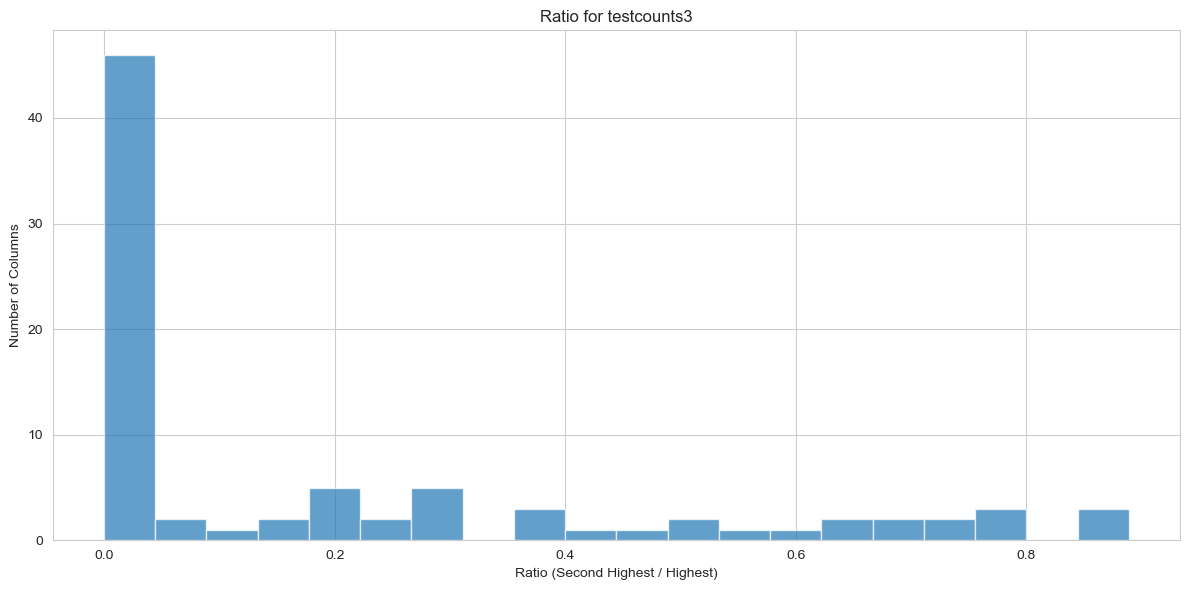

In [38]:
# Plot the second to first ratio histogram for the third test dataset
fig, ax = plot_second_to_first_ratio_histogram(testcounts3, "Ratio for testcounts3")
plt.show()

In [51]:
def plot_all_rows(df, title="All Rows Plot", figsize=(12, 6), alpha=0.1, normalize=False, stairstep=False, ignore_constant=False):
    """
    Plot all rows of a dataframe on the same axes.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input dataframe where each row represents a different series
    title : str
        Title for the plot
    figsize : tuple
        Figure size in inches (width, height)
    alpha : float
        Transparency of the plotted lines (0 to 1)
    normalize : bool or str
        If True or "mean", subtract mean from each row
        If "mode", subtract mode from each row
        If "median", subtract median from each row
        If False, no normalization
    stairstep : bool, str, or int
        If False, plot normal lines
        If "1", use standard stairstep plot
        If int >= 2, use custom stairstep with specified number of repeats
    ignore_constant : bool
        If True, drops any rows that have the same value throughout
        
    Example:
    --------
    >>> fig, ax = plot_all_rows(testcounts1, "All Rows in testcounts1")
    plt.show()
    """
    # Create figure and axis
    fig, ax = plt.subplots(figsize=figsize)
    
    # Count unique values per row and create frequency table
    unique_counts = df.nunique(axis=1)
    value_counts = unique_counts.value_counts().sort_index()
    print("\nNumber of unique values per row:")
    print(value_counts)
    
    # Count constant rows from value_counts
    constant_rows = value_counts.get(1, 0)  # Get count of rows with 1 unique value, default to 0 if none exist
    print(f"Number of constant rows: {constant_rows} out of {len(df)} total rows ({len(df) - constant_rows} varying rows)")
    
    # Filter out constant rows if requested
    if ignore_constant:
        df = df[unique_counts > 1]
        print(f"Filtered out {constant_rows} constant rows")
    
    # Get viridis colormap
    colors = plt.cm.viridis(np.linspace(0, 1, len(df)))
    
    # Plot each row
    for i in range(len(df)):
        row = df.iloc[i]
        if normalize:
            if normalize == "mode":
                row = row - mode(row).mode
            elif normalize == "median":
                row = row - row.median()
            else:  # True or "mean"
                row = row - row.mean()
                
        if stairstep:
            y = np.array(row)
            if stairstep == "1":
                # Use standard stairstep plot
                ax.step(df.columns, y, alpha=alpha, color=colors[i])
            else:
                # Custom stairstep with specified number of repeats
                repeats = int(stairstep) if isinstance(stairstep, (int, str)) else 2
                y_new = []
                for j in range(len(y)):
                    # Add each point the specified number of times
                    y_new.extend([y[j]] * repeats)
                
                y_new = np.array(y_new)
                x_new = np.arange(len(y_new))
                ax.plot(x_new, y_new, alpha=alpha, color=colors[i])
        else:
            ax.plot(df.columns, row, alpha=alpha, color=colors[i])
            
    # Customize the plot
    ax.set_title(title)
    ax.set_xlabel('Column')
    ax.set_ylabel('Value')
    plt.tight_layout()
    
    return fig, ax



Number of unique values per row:
4      4
5     11
6     16
7     20
8      8
9      6
10     3
11     2
Name: count, dtype: int64
Number of constant rows: 0 out of 70 total rows (70 varying rows)
Filtered out 0 constant rows


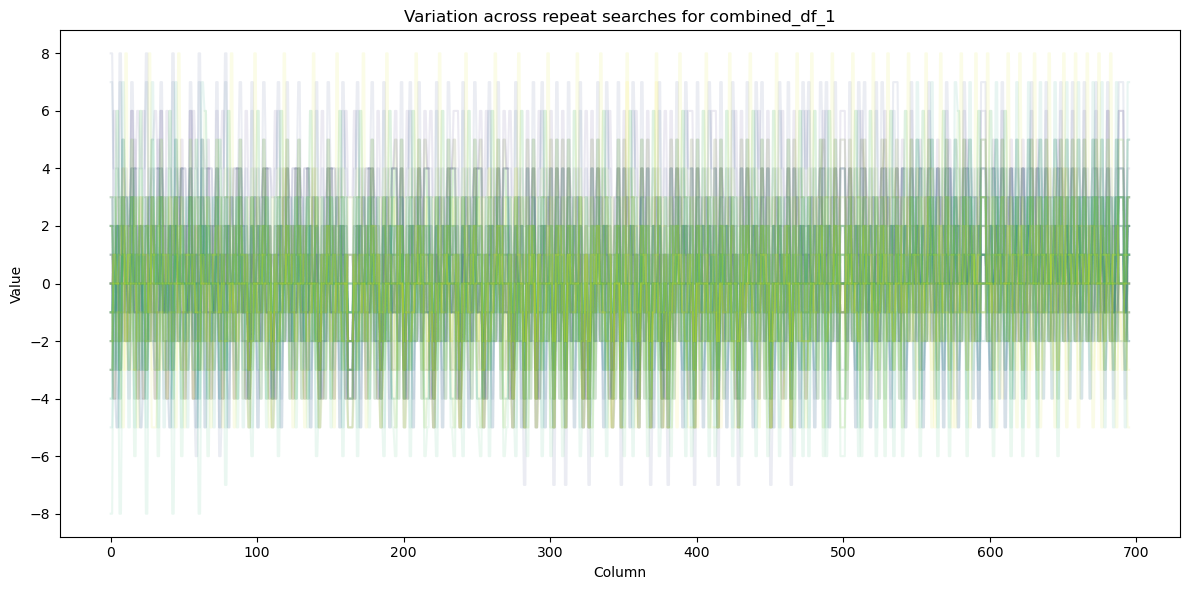

In [55]:
# Plot the variations across repeat searches for the first test dataset
fig, ax = plot_all_rows(combined_df_1, "Variation across repeat searches for combined_df_1", figsize=(12, 6), normalize="mode", stairstep=2, ignore_constant=True)
plt.show()


Number of unique values per row:
1     45
2    121
3     27
4      8
5      2
7      1
Name: count, dtype: int64
Number of constant rows: 45 out of 204 total rows (159 varying rows)
Filtered out 45 constant rows


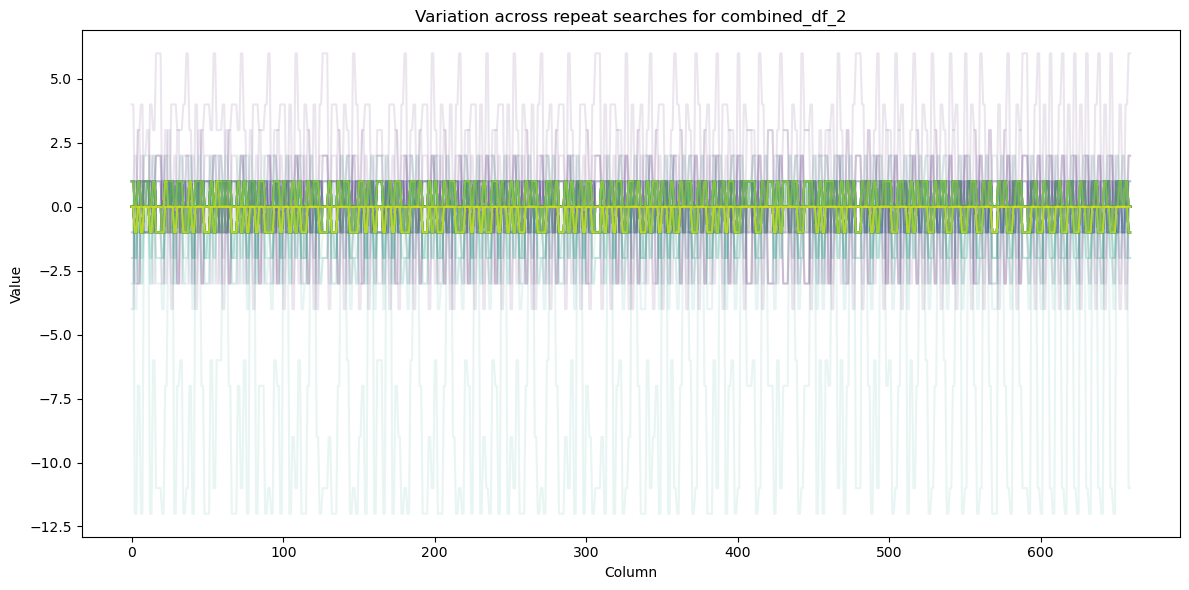

In [56]:
# Plot the variations across repeat searches for the second test dataset
fig, ax = plot_all_rows(combined_df_2, "Variation across repeat searches for combined_df_2", figsize=(12, 6), normalize="mode", stairstep=2, ignore_constant=True)
plt.show()



Number of unique values per row:
1    46
2    25
3     7
4     3
5     1
6     1
7     1
Name: count, dtype: int64
Number of constant rows: 46 out of 84 total rows (38 varying rows)
Filtered out 46 constant rows


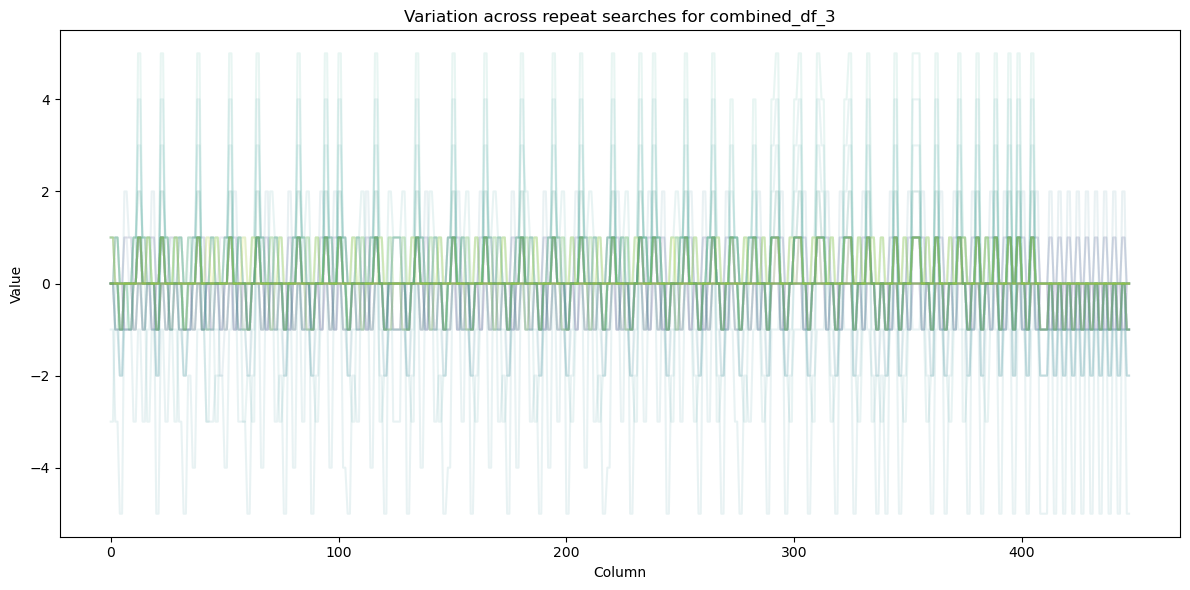

In [54]:
# Plot the the variations across repeat searches for the third test dataset
fig, ax = plot_all_rows(combined_df_3, "Variation across repeat searches for combined_df_3", figsize=(12, 6), normalize="mode", stairstep=2, ignore_constant=True)
plt.show()

In [10]:
# define function to plot stacked histograms in 3D
def plot_stacked_histograms_3d(df, bins=20, hist_range=None, colors=None, alpha=0.8, figsize=(12, 8), title=None, normalize=None, ignore_constant=False):
    """
    Plots a stacked 3D histogram, one per row of the DataFrame.
    
    Parameters:
        df (pd.DataFrame): Each row is a separate histogram.
        bins (int): Number of bins for the histograms.
        hist_range (tuple): Range for the histograms (min, max).
        colors (list): List of colors for each histogram.
        alpha (float): Transparency of the bars.
        figsize (tuple): Figure size in inches (width, height).
        title (str): Title for the plot.
        normalize (str): Normalization method ('mode' or None).
        ignore_constant (bool): Whether to ignore constant rows.
        
    Returns:
        tuple: (fig, ax) The figure and axes objects
    """
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, projection='3d')
    
    n_rows = df.shape[0]
    y_pos = np.arange(n_rows)
    
    if colors is None:
        # Generate colors if not provided
        colors = plt.cm.viridis(np.linspace(0, 1, n_rows))
    
    for i, (idx, row) in enumerate(df.iterrows()):
        data = row.values
        
        # Skip constant rows if ignore_constant is True
        if ignore_constant and len(np.unique(data)) == 1:
            continue
            
        # Normalize data if requested
        if normalize == "mode":
            mode_value = mode(data, keepdims=True)[0][0]
            data = data - mode_value
            
        hist, bins_edges = np.histogram(data, bins=bins, range=hist_range)
        xs = (bins_edges[:-1] + bins_edges[1:]) / 2
        ax.bar(xs, hist, zs=i, zdir='y', alpha=alpha, color=colors[i % len(colors)], label=str(idx))
    
    ax.set_xlabel('Value')
    ax.set_ylabel('Row')
    ax.set_zlabel('Frequency')
    ax.set_yticks(y_pos)
    #ax.set_yticklabels(df.index)
    ax.set_yticklabels([])
    if title:
        ax.set_title(title)
    #plt.legend()
    
    return fig, ax

In [11]:
# Plot in 3d the variations across repeat searches for the second test dataset
fig, ax = plot_stacked_histograms_3d(combined_df_2, figsize=(12, 6), normalize="mode", ignore_constant=True)
plt.show(block=True)